so this project each image chips as a picture of different atmospheric condition and different classes of land use or land cover and there are about 6 multi-classes and some with multi-labels, which are as follows:

muiti-classes             multi-labels

1. cloud_cover              (clear,partly,cloudy,haze)

2. primary_rain_forest      no_multi_label

3. water                    (rivers,lakes)

4. habitation               (large_city,small_homes)

5. agriculture               no_multi_label

6. roads                     no_multi_label





In [88]:
import pandas as pd
import numpy as np

In [89]:
from random import shuffle
import os
from zipfile import ZipFile
from PIL import Image
import numpy as np
import cv2
from tqdm import tqdm
import random as rn
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import warnings
import pandas as pd
from matplotlib import style
import seaborn as ans 

from keras.preprocessing.image import ImageDataGenerator

from keras.models import Sequential

from keras.layers import Dense
from keras.layers import Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

from keras.optimizers import Adam,SGD,Adagrad,Adadelta,RMSprop

from keras.utils import to_categorical

from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold

%matplotlib inline

In [90]:
df = pd.read_csv('train_v2.csv', sep = ',')
df.head()
np.sum(df['tags'].value_counts().values[:14])

31307

In [91]:
df['tags'].value_counts()

clear primary                                                   13636
partly_cloudy primary                                            3630
cloudy                                                           2089
clear primary water                                              1850
agriculture clear primary road                                   1680
                                                                ...  
clear cultivation habitation primary road slash_burn                1
agriculture clear cultivation water                                 1
artisinal_mine bare_ground partly_cloudy primary water              1
agriculture clear primary conventional_mine                         1
bare_ground clear cultivation primary road selective_logging        1
Name: tags, Length: 449, dtype: int64

In [92]:
df['tags'].value_counts().values[:14]

array([13636,  3630,  2089,  1850,  1680,  1626,  1471,  1170,  1125,
         712,   692,   595,   527,   504], dtype=int64)

In [93]:
df1 = df[df['tags'].isin(df['tags'].value_counts().index[:14])]
df1

,image_name,tags
0,train_0,haze primary
1,train_1,agriculture clear primary water
2,train_2,clear primary
3,train_3,clear primary
4,train_4,agriculture clear habitation primary road
...,...,...
40473,train_40473,agriculture clear habitation primary road
40474,train_40474,clear primary
40475,train_40475,cloudy
40476,train_40476,agriculture clear primary


In [94]:
df['tags'].value_counts().index[:14]

Index(['clear primary', 'partly_cloudy primary', 'cloudy',
       'clear primary water', 'agriculture clear primary road',
       'agriculture clear primary', 'haze primary',
       'agriculture clear cultivation primary',
       'agriculture clear habitation primary road',
       'agriculture clear primary water', 'agriculture partly_cloudy primary',
       'partly_cloudy primary water', 'agriculture partly_cloudy primary road',
       'clear primary road water'],
      dtype='object')

In [95]:
df2 = df1[df1['tags'] == 'clear primary']
df3 = df1[df1['tags'] == 'partly_cloudy primary']
df4 = df1[df1['tags'] == 'clear primary water']
df5 = df1[df1['tags'] == 'agriculture clear primary road']
df6 = df1[df1['tags'] == 'agriculture clear primary']
df7 = df1[df1['tags'] == 'cloudy']
df8 = df1[df1['tags'] == 'haze primary']
df9 = df1[df1['tags'] == 'agriculture clear cultivation primary']
df10 = df1[df1['tags'] == 'agriculture clear habitation primary road']
df11 = df1[df1['tags'] == 'agriculture clear primary water']
df12 = df1[df1['tags'] == 'agriculture partly_cloudy primary']
df13 = df1[df1['tags'] == 'partly_cloudy primary water']
df14 = df1[df1['tags'] == 'agriculture partly_cloudy primary road']
df15 = df1[df1['tags'] == 'clear primary road water']        
          

In [96]:
df2 = df2.sample(200, replace=False)
df3 = df3.sample(200, replace=False)
df4 = df4.sample(200, replace=False)
df5 = df5.sample(200, replace=False)
df6 = df6.sample(200, replace=False)
df7 = df7.sample(200, replace=False) 
df8 = df8.sample(200, replace=False)
df9 = df9.sample(200, replace=False)
df10 = df10.sample(200, replace=False)
df11 = df11.sample(200, replace=False)
df12 = df12.sample(200, replace=False)
df13 = df13.sample(200, replace=False)  
df14 = df14.sample(200, replace=False)
df15 = df15.sample(200, replace=False)

In [97]:
df2.head()

,image_name,tags
18530,train_18530,clear primary
27235,train_27235,clear primary
2888,train_2888,clear primary
36959,train_36959,clear primary
11392,train_11392,clear primary


In [98]:
df3.head()

,image_name,tags
20223,train_20223,partly_cloudy primary
37133,train_37133,partly_cloudy primary
305,train_305,partly_cloudy primary
24014,train_24014,partly_cloudy primary
11115,train_11115,partly_cloudy primary


In [99]:
df4.head()

,image_name,tags
22588,train_22588,clear primary water
1208,train_1208,clear primary water
26229,train_26229,clear primary water
39122,train_39122,clear primary water
39953,train_39953,clear primary water


In [100]:
df5.head()

,image_name,tags
10259,train_10259,agriculture clear primary road
6959,train_6959,agriculture clear primary road
26842,train_26842,agriculture clear primary road
35047,train_35047,agriculture clear primary road
14342,train_14342,agriculture clear primary road


In [101]:
df6.head()

,image_name,tags
36842,train_36842,agriculture clear primary
15928,train_15928,agriculture clear primary
1987,train_1987,agriculture clear primary
15517,train_15517,agriculture clear primary
8970,train_8970,agriculture clear primary


In [102]:
df7.head()

,image_name,tags
11733,train_11733,cloudy
21385,train_21385,cloudy
21486,train_21486,cloudy
8930,train_8930,cloudy
4003,train_4003,cloudy


In [103]:
final_df = df2.append([df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15])
final_df2 = pd.concat([df2,df3, df4, df5, df6, df7, df8, df9, df10, df11, df12, df13, df14, df15], ignore_index=False)
final_df

,image_name,tags
18530,train_18530,clear primary
27235,train_27235,clear primary
2888,train_2888,clear primary
36959,train_36959,clear primary
11392,train_11392,clear primary
...,...,...
12640,train_12640,clear primary road water
3051,train_3051,clear primary road water
30160,train_30160,clear primary road water
1923,train_1923,clear primary road water


In [104]:
my_data = pd.DataFrame(data=[ ], columns=['image_name', 'tags'])
for i in range(7):
    shuffled = final_df.sample(400, replace=False)
    my_data = my_data.append(shuffled)
    
my_data

,image_name,tags
4290,train_4290,clear primary road water
12476,train_12476,agriculture clear primary
31046,train_31046,partly_cloudy primary water
27090,train_27090,agriculture clear cultivation primary
14275,train_14275,partly_cloudy primary water
...,...,...
35549,train_35549,agriculture partly_cloudy primary road
11677,train_11677,agriculture clear primary water
7743,train_7743,cloudy
3192,train_3192,agriculture partly_cloudy primary road


In [105]:
y_labels = my_data
y_labels

,image_name,tags
4290,train_4290,clear primary road water
12476,train_12476,agriculture clear primary
31046,train_31046,partly_cloudy primary water
27090,train_27090,agriculture clear cultivation primary
14275,train_14275,partly_cloudy primary water
...,...,...
35549,train_35549,agriculture partly_cloudy primary road
11677,train_11677,agriculture clear primary water
7743,train_7743,cloudy
3192,train_3192,agriculture partly_cloudy primary road


In [106]:
y_labels.index

Int64Index([ 4290, 12476, 31046, 27090, 14275,  6786, 32020, 13823,  6024,
            18391,
            ...
            15620, 16166, 26604, 22653, 34103, 35549, 11677,  7743,  3192,
            25892],
           dtype='int64', length=2800)

In [107]:
Y = list(y_labels.iloc[:,1])
print(len(Y))
Y

2800


['clear primary road water',
 'agriculture clear primary',
 'partly_cloudy primary water',
 'agriculture clear cultivation primary',
 'partly_cloudy primary water',
 'agriculture partly_cloudy primary road',
 'agriculture clear primary road',
 'agriculture partly_cloudy primary road',
 'agriculture clear habitation primary road',
 'clear primary water',
 'clear primary water',
 'partly_cloudy primary',
 'agriculture clear primary water',
 'clear primary',
 'haze primary',
 'partly_cloudy primary',
 'agriculture clear cultivation primary',
 'agriculture partly_cloudy primary',
 'agriculture clear primary road',
 'clear primary',
 'agriculture clear primary road',
 'agriculture clear cultivation primary',
 'agriculture partly_cloudy primary',
 'partly_cloudy primary water',
 'haze primary',
 'agriculture partly_cloudy primary',
 'partly_cloudy primary water',
 'clear primary water',
 'clear primary road water',
 'partly_cloudy primary',
 'agriculture clear primary',
 'agriculture partly_

In [108]:
len(set(Y))

14

In [109]:
X = []
IMG_SIZE = 150
IMAGES_DIR = "C:\\Users\\Obolo Emmanuel\\Desktop\\notebooks\\trainpictures\\train_jpg"
def make_train_data(DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR, img)
        img = cv2.imread(path, cv2.IMREAD_COLOR)
        img = cv2.resize(img, (IMG_SIZE,IMG_SIZE))
        
        X.append(np.array(img))

In [110]:
make_train_data(IMAGES_DIR)

100%|██████████████████████████████████████████████████████████████████████████| 40479/40479 [2:57:45<00:00,  3.80it/s]


In [111]:
# DO THIS after running the cell upward
X = [X[index] for index in y_labels.index]
#to get the corresponding 10000 values to label Y

In [112]:
len(X)

2800

In [113]:
type(X)

list

In [114]:
#n = rn.randint(0,5)

In [115]:
#np.array(X[0:n]).shape

<Figure size 1440x1080 with 0 Axes>

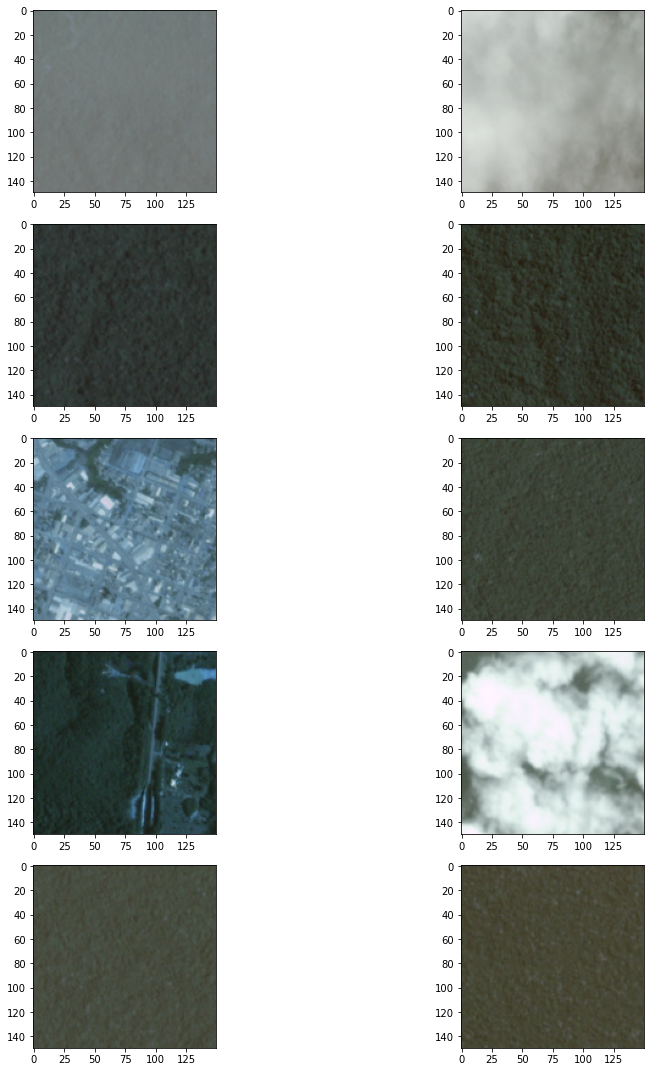

In [116]:
plt.figure(figsize=(20,15));
fig, ax = plt.subplots(5,2);
fig.set_size_inches(15,15);
for i in range(5):
    for j in range(2):
        l = rn.randint(0,len(Y))
        ax[i,j].imshow(X[l]);
        
plt.tight_layout();

In [117]:
#this labels variable will be used inside the neural network to build the output node
le = LabelEncoder()
#this first changes all values of Y to numbers and note some numbers might appear more than once even some might appear 
#at tens of thousand
Y = le.fit_transform(Y)
#the categorical turns each value of Y to a vector of dimension len(Y) where all values in the vector is 0 except a position
#that is 1 based on the label encoded value of that training example
Y = to_categorical(Y,14)
X = np.array(X)
X[4:5]

array([[[[49, 63, 45],
         [47, 58, 42],
         [47, 58, 42],
         ...,
         [50, 61, 41],
         [50, 62, 43],
         [49, 63, 41]],

        [[47, 63, 43],
         [45, 58, 39],
         [46, 57, 40],
         ...,
         [46, 59, 36],
         [46, 60, 40],
         [47, 60, 40]],

        [[42, 56, 34],
         [41, 53, 33],
         [46, 55, 36],
         ...,
         [43, 59, 36],
         [44, 56, 39],
         [45, 54, 39]],

        ...,

        [[55, 64, 46],
         [51, 62, 46],
         [49, 59, 43],
         ...,
         [54, 65, 49],
         [54, 66, 47],
         [53, 67, 50]],

        [[55, 67, 50],
         [52, 64, 47],
         [50, 59, 40],
         ...,
         [52, 67, 49],
         [53, 66, 43],
         [53, 64, 43]],

        [[57, 72, 53],
         [53, 67, 47],
         [51, 60, 40],
         ...,
         [55, 69, 53],
         [55, 70, 51],
         [52, 70, 48]]]], dtype=uint8)

In [118]:
np.max(X[:,:,:,:])

255

In [119]:
X = X/255

In [120]:
print(X.shape)

(2800, 150, 150, 3)


In [121]:
X[4:5]

array([[[[0.19215686, 0.24705882, 0.17647059],
         [0.18431373, 0.22745098, 0.16470588],
         [0.18431373, 0.22745098, 0.16470588],
         ...,
         [0.19607843, 0.23921569, 0.16078431],
         [0.19607843, 0.24313725, 0.16862745],
         [0.19215686, 0.24705882, 0.16078431]],

        [[0.18431373, 0.24705882, 0.16862745],
         [0.17647059, 0.22745098, 0.15294118],
         [0.18039216, 0.22352941, 0.15686275],
         ...,
         [0.18039216, 0.23137255, 0.14117647],
         [0.18039216, 0.23529412, 0.15686275],
         [0.18431373, 0.23529412, 0.15686275]],

        [[0.16470588, 0.21960784, 0.13333333],
         [0.16078431, 0.20784314, 0.12941176],
         [0.18039216, 0.21568627, 0.14117647],
         ...,
         [0.16862745, 0.23137255, 0.14117647],
         [0.17254902, 0.21960784, 0.15294118],
         [0.17647059, 0.21176471, 0.15294118]],

        ...,

        [[0.21568627, 0.25098039, 0.18039216],
         [0.2       , 0.24313725, 0.18039216]

In [122]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.20,random_state=42)
#now we split our data into train and test
#note that your test_size or random state can be different based on
#your choice.

In [123]:
np.random.seed(42)
rn.seed(42)
tf.random.set_seed(42)

In [125]:
"""
now is time for the work where we use the keras 
model here and this place involves a lot of work
we have 6 layers here
1.the input layer just being the dimension
2.4 hidden layers 
3.the output layer, where the values of the last hidden layer
 enters and where the final activation function is used
4. since we are dealing with image recognition we tend to use 
   the convoluted neural nrtwork with keras Conv2D
5.all other information will be explained there 

los geht's!

"""
model = Sequential()
#first hidden layer taken the input layer
"""
a convolutional 2d neural network creates a samll number of windows and floats 
over every training example and each one of these windows is their own neural 
network so i feel the conv2d works like random forest classifiers having so many
neural network that works on an image before each image is classified

the filters are the small created window of the Conv2d neural network
the kernel size helps to convert each image of 150 by 150 by 3 into a 5,5,3 image 
pixel i.e into 2d based on the Conv2d neural network although the different
color on each pixels matter but is not used visibly but underground
work is done on it

and when you have a convoluted2d we have to pool it back into a neural network#
every time.

"""
model.add(Conv2D(filters = 25, kernel_size = (5,5), padding = 'Same', activation = 'relu', input_shape = (150,150,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

#this first layers takes in about 150 * 150 inputs
#with each pixel or input having 3 forms of color
#but about the texture of each pixel is done underground
#although it must be shown to be a shape of your inputs 
#after that we talked about conv2d being like random forest
#we were exactly right but more to know about it
#now the maxpooling helps use take percentage of the best new inputs
#based on the poolsize of our choice 
#and these steps apply to all layers to


#second hidden layer
model.add(Conv2D(filters = 54, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.4))


model.add(Conv2D(filters = 80, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(Dropout(0.4))

"""
model.add(Conv2D(filters = 96, kernel_size = (3,3), padding = 'Same', activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2,2), strides = (2,2)))
model.add(dropout(0.4))
"""
"""
after building the layers 
we tend to make every data that enters into the layers
to be in 1d array that is what flatten() does

"""
model.add(Flatten())
"""
this dense was added also dont know what it does at first
but as i progress i would learn and it takes the activation relu
and finally the output taking the activation function to actually classify the image
as this and this flower
"""
model.add(Dense(1052))
model.add(Activation('relu'))

model.add(Dense(14, activation = 'softmax'))

In [126]:
# creating a batchsize and epochs
batch_size = 200 # EACH AMOUNT OF FLOWER DATA WE SEND TO OUR NEURAL NETWORK
epochs = 10 # THE NUMBER OF TIMES WE ARE GOING TO LOOP THROUGH ALL TARINING EXAMPLES

from keras.callbacks import ReduceLROnPlateau
red_lr = ReduceLROnPlateau(monitor = 'val_acc',patience = 3,verbose = 1,factor = 0.1)


In [128]:
"""
Generating the images and changing them in different angles
to see if it would still be predicted correctly
"""
"""
set input mean to 0 over the dataset
set each sample mean to 0
divide inputs by std of the dataset
divide each input by its std
apply ZCA whitening
randomly rotate images in a range (degrees, 0 to 180)
random zoom image
randomly shift images horizontally (fraction of total width)
randomly shift images vertically (fraction of total height)
randomly flip images
randomly flip images 
"""

datagen = ImageDataGenerator(featurewise_center = False,                    
                             samplewise_center = False,
                             featurewise_std_normalization = False,
                             samplewise_std_normalization = False,
                             zca_whitening = False,
                             rotation_range = 10,
                             zoom_range = 0.3,
                             width_shift_range = 0.2,
                             height_shift_range = 0.2,
                             horizontal_flip = True,
                             vertical_flip = False)  
#this is not good sometimes because when you have a bias in terms
#of having more part of a data than the other that was when we did 
#in the classification aspect we used smote 
#so if you have high bias already in the data do not use this unless it 
#doubles the bias

In [130]:
#building the loss function and optimizer
model.compile(optimizer=Adam(learning_rate=0.01),
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [131]:
model.summary()
"""
the last part of these summary shows after each input have enter 
some multiplication and calculation occurs to them such that for every
input the last hidden layer produces an ouput which are used as input
for the output layer but before this, these inputs are now multiplied by your specified
number of nodes which are produced by the Dense function and
add the bias based on the number of nodes and what activation
should be used before we use the last output as input to be 
multiplied by the nodes gotten from the number of labels
to the main ouput layer that uses the last activation function , here
the softmax that check for the predicted label with the highest
probability and compares it to the actual correct label and check if it 
right or wrong and does the backward propagation and loss fuction
and optimization algorithm till you have a good neural network



"""

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 150, 150, 25)      1900      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 75, 75, 25)       0         
 2D)                                                             
                                                                 
 dropout (Dropout)           (None, 75, 75, 25)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 75, 75, 54)        12204     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 37, 37, 54)       0         
 2D)                                                             
                                                                 
 dropout_1 (Dropout)         (None, 37, 37, 54)       

'\nthe last part of these summary shows after each input have enter \nsome multiplication and calculation occurs to them such that for every\ninput the last hidden layer produces an ouput which are used as input\nfor the output layer but before this, these inputs are now multiplied by your specified\nnumber of nodes which are produced by the Dense function and\nadd the bias based on the number of nodes and what activation\nshould be used before we use the last output as input to be \nmultiplied by the nodes gotten from the number of labels\nto the main ouput layer that uses the last activation function , here\nthe softmax that check for the predicted label with the highest\nprobability and compares it to the actual correct label and check if it \nright or wrong and does the backward propagation and loss fuction\nand optimization algorithm till you have a good neural network\n\n\n\n'

In [ ]:
History = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),
                              epochs = epochs, validation_data = (x_test,y_test),
                              verbose = 1, steps_per_epoch = x_train.shape[0] // batch_size)

<ipython-input-132-5a50db63cff1>:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  History = model.fit_generator(datagen.flow(x_train,y_train,batch_size=batch_size),


Epoch 1/10
11/11 [==============================] - 1079s 77s/step - loss: 8.5696 - accuracy: 0.0672 - val_loss: 2.6585 - val_accuracy: 0.0643
Epoch 2/10
11/11 [==============================] - 904s 77s/step - loss: 2.6429 - accuracy: 0.0843 - val_loss: 2.6526 - val_accuracy: 0.0500
Epoch 3/10


In [ ]:
plt.plot(History.history['loss'])
plt.plot(History.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.legend(['train', 'test'])
plt.show()